In [1]:
%pylab inline
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# Load CSV into Memory

In [2]:
df = pd.read_csv('Uber_Raw_Data_April_2014',low_memory=False)
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Convert Date/Time into pandas Timestamp

In [3]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


## Create a function to get Date of Month
## Add Date of Month column to Dataframe

In [4]:
def get_dom(dt):
    return dt.day

df['DoM'] = df['Date/Time'].map(get_dom)

df.tail()

,Date/Time,Lat,Lon,Base,DoM
379223,2014-04-07 15:14:00,40.7200,-74.0011,B02682,7
379224,2014-04-07 15:14:00,40.7640,-73.9769,B02682,7
379225,2014-04-07 15:14:00,40.7240,-73.998,B02682,7
379226,2014-04-07 15:14:00,40.7747,-73.9562,B02682,7
379227,2014-04-07 15:14:00,40.7252,-,NaN,7


## Create functions to get weekday and hour and add them to dataframe

In [5]:
def get_weekday(dt):
    return dt.weekday()

df['Weekday'] = df['Date/Time'].map(get_weekday)


def get_hour(dt):
    return dt.hour

df['Hour'] = df['Date/Time'].map(get_hour)

df[10000:10010]

,Date/Time,Lat,Lon,Base,DoM,Weekday,Hour
10000,2014-04-08 19:45:00,40.7402,-73.9997,B02512,8,1,19
10001,2014-04-08 19:45:00,40.7183,-73.9501,B02512,8,1,19
10002,2014-04-08 19:52:00,40.7538,-73.9773,B02512,8,1,19
10003,2014-04-08 19:54:00,40.7592,-73.9649,B02512,8,1,19
10004,2014-04-08 19:55:00,40.7341,-74.0025,B02512,8,1,19
10005,2014-04-08 19:55:00,40.7435,-73.9839,B02512,8,1,19
10006,2014-04-08 19:55:00,40.7142,-74.0148,B02512,8,1,19
10007,2014-04-08 19:56:00,40.7336,-74.002,B02512,8,1,19
10008,2014-04-08 19:56:00,40.7049,-73.9334,B02512,8,1,19
10009,2014-04-08 19:56:00,40.7685,-73.8626,B02512,8,1,19


# Analysis
## Analyze the DoM in a HISTOGRAM

Text(0.5, 1.0, 'FREQUENCY BY DoM : UBER APRIL 2014')

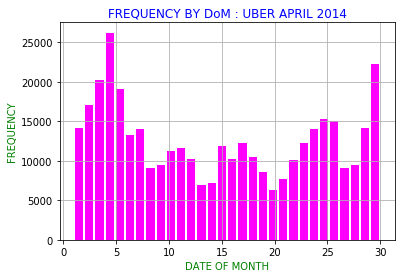

In [6]:
plt.hist(df['DoM'],bins=30,rwidth=0.8,color='magenta')
# We have taken bin=30 since there are 30 days in a month
plt.grid()
plt.xlabel('DATE OF MONTH',color='G')
plt.ylabel('FREQUENCY',color='G')
plt.title('FREQUENCY BY DoM : UBER APRIL 2014',color='B')

## Analyze the above Histogram in Theoritical Form

In [7]:
# We can perform the below codings in normal python format

for k,rows in df.groupby('DoM'):
    print(k,len(rows))

1 14223
2 17129
3 20296
4 26230
5 19148
6 13235
7 13973
8 9149
9 9418
10 11309
11 11650
12 10297
13 6902
14 7203
15 11853
16 10286
17 12304
18 10435
19 8578
20 6274
21 7690
22 10089
23 12255
24 14001
25 15271
26 15070
27 9103
28 9438
29 14101
30 22318


### Let's perform the above in pandas format

In [8]:
def count_rows(rows):
    return len(rows)

by_date = df.groupby('DoM').apply(count_rows)
by_date

DoM
1     14223
2     17129
3     20296
4     26230
5     19148
6     13235
7     13973
8      9149
9      9418
10    11309
11    11650
12    10297
13     6902
14     7203
15    11853
16    10286
17    12304
18    10435
19     8578
20     6274
21     7690
22    10089
23    12255
24    14001
25    15271
26    15070
27     9103
28     9438
29    14101
30    22318
dtype: int64

# Plot the above data in a normal graph

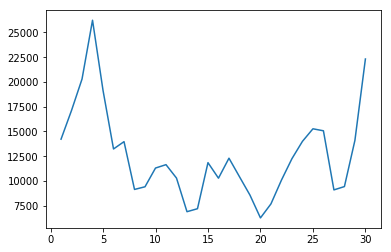

In [9]:
plt.plot(by_date)

# Plot the Above data in a Bar Graph

<BarContainer object of 30 artists>

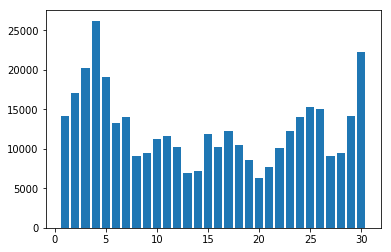

In [10]:
plt.bar(range(1,31),by_date)

# Let's sort the above dates in ascending order and pull out a  bar graph

In [11]:
by_date_sorted = by_date.sort_values()
by_date_sorted

DoM
20     6274
13     6902
14     7203
21     7690
19     8578
27     9103
8      9149
9      9418
28     9438
22    10089
16    10286
12    10297
18    10435
10    11309
11    11650
15    11853
23    12255
17    12304
6     13235
7     13973
24    14001
29    14101
1     14223
26    15070
25    15271
2     17129
5     19148
3     20296
30    22318
4     26230
dtype: int64

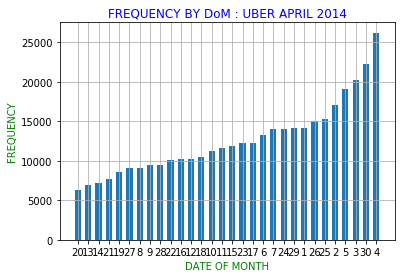

In [12]:
plt.bar(range(1,31),by_date_sorted,width=0.6)
plt.xticks(range(1,31),by_date_sorted.index)
plt.grid()
plt.xlabel('DATE OF MONTH',color='G')
plt.ylabel('FREQUENCY',color='G')
plt.title('FREQUENCY BY DoM : UBER APRIL 2014',color='B');

# Analysis by Hour

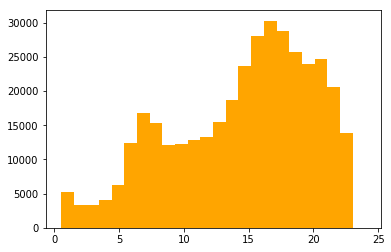

In [13]:
plt.hist(df['Hour'],bins=24,range=(0.5,24),color='orange');

# Analysis by Weekday

Text(0.5, 1.0, 'Data Analysis of Uber (Weekday Analysis) April 2014')

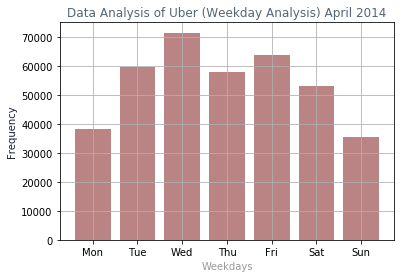

In [14]:
plt.hist(df['Weekday'],bins=7,rwidth=0.8,range=(-0.5,6.5),color='#AA6666',alpha=0.8)
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split());
plt.grid()
plt.xlabel('Weekdays',color='#999999')
plt.ylabel('Frequency',color='#112233')
plt.title('Data Analysis of Uber (Weekday Analysis) April 2014',color='#556677')

# Cross Analysis (Hour and weekday)

In [15]:
cross = df.groupby(['Weekday','Hour']).apply(count_rows).unstack()
cross

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,332,170,161,374,686,1066,2043,2675,2167,1546,...,2219,2294,2880,3252,2767,2534,2029,1736,1110,598
1,454,216,189,334,559,1105,2479,3490,3028,1927,...,2975,3988,4975,5427,4644,4196,3976,3842,2299,1218
2,560,329,248,377,655,1294,2780,3763,3439,2523,...,3598,4690,5440,6062,5505,5047,5112,4471,3117,1588
3,526,298,213,378,569,959,2133,2799,2460,1804,...,2795,3562,4163,4692,4500,4018,4367,4559,3771,2017
4,918,513,357,500,628,930,1984,2803,2542,1881,...,2952,3719,4442,4833,5224,4464,3579,4468,4704,3710
5,2024,1567,1010,645,482,464,592,749,892,1194,...,2074,3054,3731,3847,4200,3804,3387,4097,4559,4058
6,3283,2102,1122,751,497,412,450,589,854,1225,...,2011,2364,2398,2183,1914,1722,1505,1523,1080,691


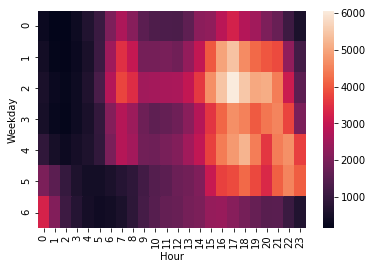

In [16]:
sb.heatmap(cross)

# Analysis by Latitude

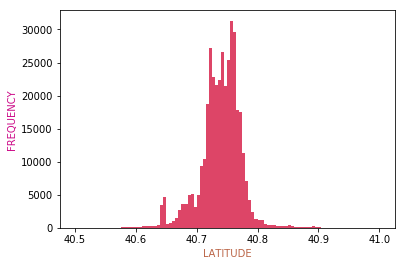

In [17]:
plt.hist(df['Lat'],bins=100,range=(40.5,41),color='#DD4567')
plt.xlabel('LATITUDE',color='#BB6547')
plt.ylabel('FREQUENCY',color='#CC0987');